# Gradient Descent

Trabajo realizado por

- Flores Tun, Jorge David
- Sanchez Soberanis, Felipe

Aprendizaje Automático, enero-mayo 2023

## Conepto del descenso del gradiente

Gradiente descendente (gradient descent en inglés) es un algoritmo iterativo de optimización utilizado en aprendizaje automático y otros modelos matemáticos para minimizar una función de coste ajustando los parámetros del modelo. Funciona calculando el gradiente (o la derivada) de la función de coste con respecto a los parámetros del modelo, y luego actualizando los parámetros en la dirección opuesta del gradiente para minimizar la función de coste.

El gradiente es un vector que apunta en la dirección del mayor aumento en la función de coste, por lo que moverse en la dirección opuesta del gradiente te llevará al punto del mayor descenso. Es por eso que el gradiente descendente actualiza iterativamente los parámetros del modelo en la dirección opuesta del gradiente hasta que alcanza un mínimo local, donde la función de coste ya no se puede reducir.

Existen diferentes variaciones del gradiente descendente, incluyendo el gradiente descendente por lotes (batch gradient descent), el gradiente descendente estocástico (stochastic gradient descent) y el gradiente descendente por mini-lotes (mini-batch gradient descent), cada uno con sus propias ventajas y desventajas. El gradiente descendente se utiliza ampliamente en el aprendizaje profundo (deep learning) y otros algoritmos de aprendizaje automático para optimizar modelos y mejorar su precisión.

## Extensión del concepo a algebra lineal

Tomando en cuenta el gradiente de la función objetivo:

$$
\nabla \text{obj} = \sum_{i = 0}^{n} (\hat{y} - y) D(XW)
$$

donde D es la derivada de la matriz obtenida de la multiplicación de las matrices X, que son los datos observados, y W, que son los pesos.

Esto quiere decir que, para cada epoch (iteración de entrenamiento), los pesos se actualizarán de la siguiente manera:

$$
w_j = w_j - \text{learning rate} \times \nabla \text{obj}_j
$$

Así que, en cada epoch, los pesos son actualizados en sentido contrario a la gradiente, es decir, hacia el mínimo; en un paso del tamaño definido por el "learning rate" (razón de aprendizaje).

Para poder utilizar la forma de multiplicación matricial, se toman en cuenta, para ejemplificar, 2 matrices $X_{3x2}$ y $W_{2x1}$:

$$
X =
    \begin{bmatrix}
        x_1 & x_2 \\
        x_3 & x_4 \\
        x_5 & x_6 \\
    \end{bmatrix}
$$

$$
W =
    \begin{bmatrix}
        w_1  \\
        w_2  \\
    \end{bmatrix}
$$

Esto quiere decir que:

$$
XW =
    \begin{bmatrix}
        x_1 w_1 + x_4 w_2 \\
        x_2 w_1 + x_5 w_2 \\
        x_3 w_1 + x_6 w_2 \\
    \end{bmatrix}
$$


Obteniendo la derivada parcial para cada uno de los pesos:

$$
\frac{\partial XW}{\partial w_1} =
\begin{bmatrix}
    \frac{\partial(x_1 w_1 + x_4 w_2)}{\partial w_1} \\
    \frac{\partial(x_2 w_1 + x_5 w_2)}{\partial w_1} \\
    \frac{\partial(x_3 w_1 + x_6 w_2)}{\partial w_1} \\
\end{bmatrix} =
\begin{bmatrix}
    x_1 \\
    x_2 \\
    x_3 \\
\end{bmatrix}
$$

$$
\frac{\partial XW}{\partial w_2} =
\begin{bmatrix}
    \frac{\partial(x_1 w_1 + x_4 w_2)}{\partial w_2} \\
    \frac{\partial(x_2 w_1 + x_5 w_2)}{\partial w_2} \\
    \frac{\partial(x_3 w_1 + x_6 w_2)}{\partial w_2} \\
\end{bmatrix} =
\begin{bmatrix}
    x_4 \\
    x_5 \\
    x_6 \\
\end{bmatrix}
$$

Lo que se puede simplificar a:

$$
\frac{\partial XW}{\partial w_1} =
X
\begin{bmatrix}
    1 \\
    0 \\
\end{bmatrix}
$$

$$
\frac{\partial XW}{\partial w_2} =
X
\begin{bmatrix}
    0 \\
    1 \\
\end{bmatrix}
$$

Esto quiere decir, que la derivada de todos los pesos puede ser calculada por medio de la utilización de una matriz con una diagonal unitaria de dimensión $(p+1 \times p+1)$.

## Variantes del descenso del gradiente

### Stochastic gradient descent

"Stochastic Gradient Descent" (SGD) es una variante del algoritmo de "Gradient Descent" utilizado para optimizar modelos de aprendizaje automático. En esta variante, sólo se utiliza un ejemplo de entrenamiento aleatorio para calcular el gradiente y actualizar los parámetros en cada iteración.

Ventajas:

- Velocidad: SGD es más rápido que otras variantes de Gradient Descent como Batch Gradient Descent y Mini-Batch Gradient Descent ya que sólo utiliza un ejemplo para actualizar los parámetros.

- Eficiencia de memoria: Dado que SGD actualiza los parámetros para cada ejemplo de entrenamiento de uno en uno, es eficiente en memoria y puede manejar grandes conjuntos de datos.

- Evita mínimos locales: Debido a las actualizaciones ruidosas en SGD, tiene la capacidad de escapar de los mínimos locales y converger a un mínimo global.

Desventajas:

- Actualizaciones ruidosas: Las actualizaciones en SGD son ruidosas y tienen una alta varianza, lo que puede hacer que el proceso de optimización sea menos estable y provocar oscilaciones alrededor del mínimo.

- Convergencia lenta: SGD puede requerir más iteraciones para converger al mínimo ya que actualiza los parámetros para cada ejemplo de entrenamiento de uno en uno.

- Sensibilidad a la tasa de aprendizaje: La elección de la tasa de aprendizaje puede ser crítica en SGD, ya que utilizar una tasa de aprendizaje alta puede hacer que el algoritmo sobrepase el mínimo, mientras que una tasa de aprendizaje baja puede hacer que el algoritmo converja lentamente.

- Menos preciso: Debido a las actualizaciones ruidosas, el SGD puede no converger al mínimo global exacto y dar lugar a una solución subóptima. Esto puede mitigarse utilizando técnicas como la programación de la tasa de aprendizaje y las actualizaciones basadas en el impulso.

### Mini-batch gradient descent

"Mini-batch Gradient Descent" (MGD) es una variación del algoritmo de "Gradient Descent" que divide el entrenamiento en pequeños lotes que son usados para calcular el modelo del error y actualizar los coeficientes. Esto quiere decir que, suponiendo que se tengan 1000 datos y un tamaño de lote definido de 50, se tomarán 50 datos al azar y se utilizarán para calcular el error y actualizar los coeficientes.

Ventajas:

- La frecuencia de actualización del modelo es mayor que en BGD: En MGD no estamos esperando los datos enteros, sólo pasamos 50 registros o 200 o 100 o 256, y luego pasamos a la optimización.

- La dosificación permite tanto la eficiencia de no tener todos los datos de entrenamiento en memoria como la implementación de algoritmos. También controlamos el consumo de memoria para almacenar las errores de los datos.

- Las actualizaciones por lotes proporcionan un proceso computacionalmente más eficiente que SGD.

Desventajas:

- No hay garantía de convergencia de un error de mejor manera.

- Dado que el tamaño de muestra que tomamos no está representando las propiedades (o varianza) de conjuntos de datos enteros, no seremos capaces de obtener una convergencia es decir, no obtendremos mínimos absolutos globales o locales.

- Al utilizar MGD, ya que estamos tomando los registros en lotes, por lo que, podría suceder que en algunos lotes, tenemos algún error y en otros lotes, tenemos algún otro error. Por lo tanto, tendremos que controlar la tasa de aprendizaje por nosotros mismos, siempre que utilicemos MGD. Si la tasa de aprendizaje es muy baja, la tasa de convergencia también disminuirá. Si la tasa de aprendizaje es demasiado alta, no obtendremos un mínimo absoluto global o local. Así que tenemos que controlar la tasa de aprendizaje.

En la siguiente gráfica se puede observar la diferencia del trayecto que los diferentes algoritmos toman para llegar al valor de error mínimo que son capaces de encontrar:

![](media/gradient-descents-comparisons.png)

Es importante hacer notar que el algoritmo más utilizado es el MGD, ya que es el punto medio entre precisión para encontrar el error mínimo y la cantidad de iteraciones para lograr esto.

## Implementación del algoritmo del descenso del gradiente y sus variantes

Se preparan los datos y se definen las funciones encargadas, tanto de generar una nube de puntos basado en modelos algebraicos de grado n como la estrucuturación de dicha nube en numpy.

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import random

COEFFS: np.ndarray = np.array([2, 15])
INIT_VALUE = -10
END_VALUE = 10
ITERATIONS: int = 500
LEARNING_RATE: float = 0.05


def eval_poly(coeffs: np.ndarray, x: float) -> float:
    total: float = 0
    for power, coeff in enumerate(coeffs[::-1]):
        total += (x**power) * coeff
    return total


Se define el algoritmo iterativo del descenso del gradiente.

In [6]:
def gradient_descent(
    x_values: np.ndarray,
    y_values: np.ndarray,
    no_weights: int,
    learning_rate: float,
    iterations: int,
    batch_size: int = -1,
) -> tuple[np.ndarray, np.ndarray]:
    if batch_size == -1:
        batch_size = x_values.size

    x_c = np.c_[np.ones((x_values.size, no_weights - 1)), x_values]
    weights = np.random.randn(no_weights, 1)
    error_log = np.zeros(iterations)

    for i in range(iterations):
        x_c_batch, y_values_batch = zip(
            *random.sample(list(zip(x_c, y_values)), batch_size)
        )

        x_c_batch = np.array(list(x_c_batch))
        y_values_batch = np.array(list(y_values_batch))

        multi = np.array(x_c_batch @ weights - y_values_batch)
        multi_squared = multi**2

        error_log[i] = (1 / (2 * batch_size)) * (multi_squared).sum()

        gradients = (1 / batch_size) * (x_c_batch.T @ multi)

        weights -= learning_rate * gradients

    return weights[::-1], error_log

Se realiza la prueba con datos generados de forma aleatoria

In [7]:
data_size = END_VALUE - INIT_VALUE + 1
no_weights = COEFFS.size

x_values = np.linspace(INIT_VALUE, END_VALUE, data_size).reshape(data_size, 1)
y_values = np.array(
    [eval_poly(COEFFS, x) * random.randint(90, 110) / 100 for x in x_values]
).reshape(data_size, 1)

#  === Batch ===
batch_result_coeffs, batch_error_log = gradient_descent(
    x_values, y_values, no_weights, LEARNING_RATE, ITERATIONS
)
batch_y_predicted = np.array([eval_poly(batch_result_coeffs, x) for x in x_values])

#  === Stochastic ===
stochastic_result_coeffs, stochastic_error_log = gradient_descent(
    x_values, y_values, no_weights, 0.01, ITERATIONS, batch_size=1
)
stochastic_y_predicted = np.array(
    [eval_poly(stochastic_result_coeffs, x) for x in x_values]
)

#  === Mini-batch ===
mini_batch_result_coeffs, mini_batch_error_log = gradient_descent(
    x_values,
    y_values,
    no_weights,
    LEARNING_RATE,
    ITERATIONS,
    batch_size=int(x_values.size * 0.50),
)
mini_batch_y_predicted = np.array(
    [eval_poly(mini_batch_result_coeffs, x) for x in x_values]
)

print("Expected result: {}".format(COEFFS))
print(
    "Batch calculated result: {}".format(batch_result_coeffs.reshape(1, no_weights))
)
print(
    "Stochastic calculated result: {}".format(
        stochastic_result_coeffs.reshape(1, no_weights)
    )
)
print(
    "Mini-batch calculated result: {}".format(
        mini_batch_result_coeffs.reshape(1, no_weights)
    )
)

Expected result: [ 2 15]
Batch calculated result: [[ 1.98690909 15.04714286]]
Stochastic calculated result: [[ 2.10737567 14.94959778]]
Mini-batch calculated result: [[ 2.06555284 14.96865798]]


Se grafican el error de cada método junto con la nube de puntos de predicción

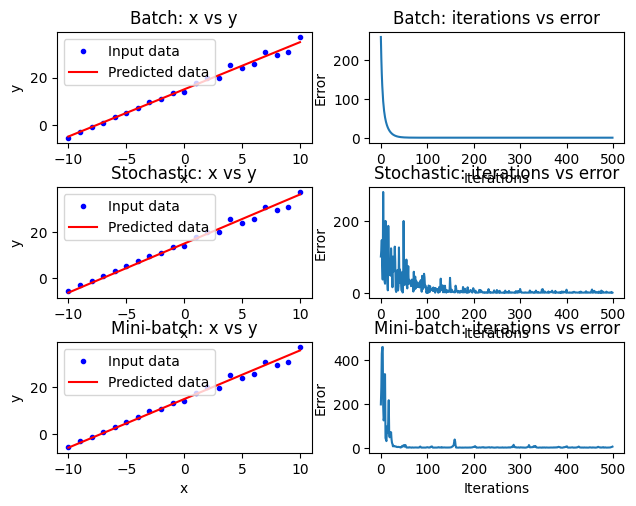

In [8]:
fig, _ = plt.subplots(3, 2)
fig.tight_layout()  # type: ignore

#  === Batch ===
plt.subplot(3, 2, 1)
plt.plot(x_values, y_values, "b.", label="Input data")
plt.plot(x_values, batch_y_predicted, "r", label="Predicted data")
plt.title("Batch: x vs y")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

plt.subplot(3, 2, 2)
plt.plot(range(ITERATIONS), batch_error_log)
plt.title("Batch: iterations vs error")
plt.xlabel("Iterations")
plt.ylabel("Error")

#  === Stochastic ===
plt.subplot(3, 2, 3)
plt.plot(x_values, y_values, "b.", label="Input data")
plt.plot(x_values, stochastic_y_predicted, "r", label="Predicted data")
plt.title("Stochastic: x vs y")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

plt.subplot(3, 2, 4)
plt.plot(range(ITERATIONS), stochastic_error_log)
plt.title("Stochastic: iterations vs error")
plt.xlabel("Iterations")
plt.ylabel("Error")

#  === Mini-batch ===
plt.subplot(3, 2, 5)
plt.plot(x_values, y_values, "b.", label="Input data")
plt.plot(x_values, mini_batch_y_predicted, "r", label="Predicted data")
plt.title("Mini-batch: x vs y")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

plt.subplot(3, 2, 6)
plt.plot(range(ITERATIONS), mini_batch_error_log)
plt.title("Mini-batch: iterations vs error")
plt.xlabel("Iterations")
plt.ylabel("Error")
plt.show()

Se concluye que el algoritmo es funcional y sin errores de código, cumpliendo con los requerimientos solicitados.